# P3: Logistic Regression

In this demo we will use `scikit-learn`, a popular library for Machine learning in Python.
Check the [documentation here](https://scikit-learn.org/stable/index.html).

## Setup

You might need to restart your kernel after running the cell below!

In [21]:
%pip install -U pandas matplotlib scikit-learn numpy plotly kaleido nbformat ipykernel

Note: you may need to restart the kernel to use updated packages.


In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression, LogisticRegression
from matplotlib.colors import LinearSegmentedColormap, Normalize
import plotly.graph_objects as go

cm = plt.cm.RdBu
cm_bright = plt.cm.jet

Read `.csv` as pandas DataFrame:

In [23]:
df = pd.read_csv('advertising.csv')

## Exploratory Data Analysis

In [24]:
df[:15]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [25]:
df.shape

(1000, 10)

In [26]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [27]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Check for class imbalances - this is important since the metric we use to evaluate the model's performance will be accuracy, which is sensitive to class imbalances.

In [28]:
zero_count = np.sum(df['Clicked on Ad'] == 0)
one_count = np.sum(df['Clicked on Ad'] == 1)

print(f'Number of data points with class 0: {zero_count}')
print(f'Number of data points with class 1: {one_count}')

Number of data points with class 0: 500
Number of data points with class 1: 500


## Feature Selection and Visualization

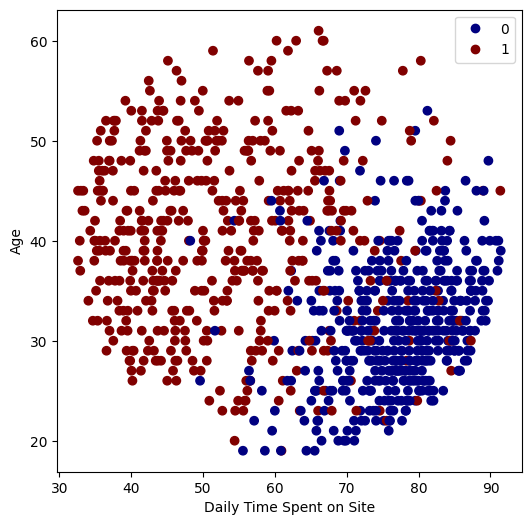

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))

# 'Daily Time Spent on Site', 'Daily Internet Usage', 'Area Income', 'Age'
feature1 = 'Daily Time Spent on Site'  
feature2 = 'Age'

p = ax.scatter(df[feature1], df[feature2], c=df['Clicked on Ad'], cmap=cm_bright)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.legend(*p.legend_elements(), loc='best')

Let's construct the data matrix $X$ and the label vector $\mathbf{y}$:

In [30]:
X = np.array([df[feature1], df[feature2]]).T
y = np.array(df['Clicked on Ad'])

In [31]:
X[:10, :]

array([[68.95, 35.  ],
       [80.23, 31.  ],
       [69.47, 26.  ],
       [74.15, 29.  ],
       [68.37, 35.  ],
       [59.99, 23.  ],
       [88.91, 33.  ],
       [66.  , 48.  ],
       [74.53, 30.  ],
       [69.88, 20.  ]])

In [32]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## Train & Test Split

We split the dataset into a training set and a test set. The training set is used to train the model, while the test set is used to evaluate the model's generalization performance.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scikit-Learn's `LogisticRegression` classifier

Check out the [`LogisticRegression` API documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

**Important Parameters**: `fit_intercept`, `max_iter`, `solver`, `penalty`

**Important Attributes**: `classes_`, `coef_`, `intercept_`. 

**Important Methods**: `fit`, `predict`, `predict_proba`, `score`.

In [34]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

mean_train_accuracy = clf.score(X_train, y_train)
mean_test_accuracy = clf.score(X_test, y_test)
print('Mean accuracy on train set:', mean_train_accuracy)
print('Mean accuracy on test set:', mean_test_accuracy)

Mean accuracy on train set: 0.90375
Mean accuracy on test set: 0.895


In [35]:
print('First few predictions on the test set:', clf.predict(X_test[:10]))

First few predictions on the test set: [0 0 0 1 0 1 1 1 0 0]


In [36]:
print('Their corresponding probabilities:\n', clf.predict_proba(X_test[:10]))

Their corresponding probabilities:
 [[0.63389353 0.36610647]
 [0.86745984 0.13254016]
 [0.95371214 0.04628786]
 [0.01463793 0.98536207]
 [0.987866   0.012134  ]
 [0.00264239 0.99735761]
 [0.00538159 0.99461841]
 [0.03197099 0.96802901]
 [0.97265987 0.02734013]
 [0.91984334 0.08015666]]


## Visualization of the Decision Boundary

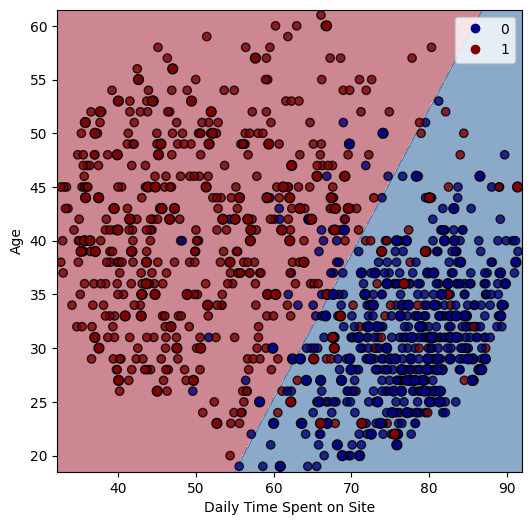

In [37]:
num_samples = 1000 # number of mesh evaluations (in each dimension)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x1_min, x1_max] x [x2_min, x2_max].
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx1, xx2 = np.linspace(x1_min, x1_max, num_samples), np.linspace(x2_min, x2_max, num_samples) 
XX1, XX2 = np.meshgrid(xx1, xx2)
Z = clf.predict(np.array([XX1.reshape(-1), XX2.reshape(-1)]).T)
Z = Z.reshape(XX1.shape)

plt.figure(1, figsize=(6, 6))
plt.contourf(XX1, XX2, 1 - Z, cmap=cm, alpha=.5) # contourf plots filled contours.

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cm_bright, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=cm_bright, s=50)

plt.xlabel(feature1)
plt.ylabel(feature2)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.legend(*p.legend_elements(), loc='best')

(You can ignore these plotting functions...) 

In [38]:

def plot_regressions2d(df, feature1, feature2=None, target='target', linear_reg=True):
    """
    Visualize linear & logistic regression predictions in 3D (two features)
    or 2D (one feature), with smooth color gradient and decision contours.
    """

    # Prepare data
    if feature2:
        X = df[[feature1, feature2]].values
    else:
        X = df[[feature1]].values
    y = df[target].values

    X_scaled = X

    # Fit model
    reg = LinearRegression() if linear_reg else LogisticRegression()
    reg.fit(X_scaled, y)

    # Define smooth blue→gray→red colormap
    colors = [(0, 0, 1), (0.7, 0.7, 0.7), (1, 0, 0)]
    cmap = LinearSegmentedColormap.from_list("blue_gray_red", colors, N=256)

    # --- Plotting ---
    if feature2:
        # Create mesh grid
        x_surf, y_surf = np.meshgrid(
            np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 200),
            np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 200)
        )
        grid = np.c_[x_surf.ravel(), y_surf.ravel()]

        # Predictions
        if linear_reg:
            z = reg.predict(grid).reshape(x_surf.shape)
            z_norm = (z - z.min()) / (z.max() - z.min())
        else:
            z = reg.predict_proba(grid)[:, 1].reshape(x_surf.shape)
            z_norm = z

        # 2D contour plot instead of 3D plane
        fig, ax = plt.subplots(figsize=(8, 6))
        contour = ax.contourf(x_surf, y_surf, z_norm, cmap=cmap, levels=200, alpha=0.8)

        # Scatter original data (color by class)
        colors = np.where(y == 1, 'r', 'b')
        ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors, s=50, edgecolor='k', alpha=0.7)

        # Decision boundary contour
        if not linear_reg:
            ax.contour(x_surf, y_surf, z, levels=[0.5], colors='k', linewidths=2, linestyles='--')

        cbar = plt.colorbar(contour, ax=ax)
        cbar.set_label('Predicted Value (Normalized)' if linear_reg else 'Predicted Probability')

        ax.set_xlabel(feature1)
        ax.set_ylabel(feature2)
        ax.set_title('2D Logistic Regression' if not linear_reg else '2D Linear Regression')
        plt.show()

    else:
        # --- 2D case ---
        fig, ax = plt.subplots(figsize=(8, 5))

        X_sorted, y_sorted = zip(*sorted(zip(X_scaled.flatten(), y)))
        X_sorted = np.array(X_sorted).reshape(-1, 1)

        if linear_reg:
            y_pred = reg.predict(X_sorted)
            y_norm = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())
        else:
            y_pred = reg.predict_proba(X_sorted)[:, 1]
            y_norm = y_pred

        # Scatter data
        colors = np.where(y == 1, 'r', 'b')
        ax.scatter(X_scaled, y, c=colors, s=50, edgecolor='k', alpha=0.7)

        # Smooth gradient line
        for i in range(len(X_sorted) - 1):
            ax.plot(
                X_sorted[i:i+2],
                y_pred[i:i+2],
                color=cmap(y_norm[i]),
                linewidth=2
            )

        # Decision boundary
        if not linear_reg:
            decision_x = X_sorted[np.argmin(np.abs(y_pred - 0.5))]
            ax.axvline(x=decision_x, color='k', linestyle='--', label='Decision Boundary (p=0.5)')

        ax.set_xlabel(feature1)
        ax.set_ylabel(target)
        ax.set_title('1D Logistic Regression' if not linear_reg else '1D Linear Regression')
        ax.legend()
        plt.show()


In [39]:


def plot_regressions(df, feature1, feature2=None, target='target', linear_reg=True):
    """
    3D visualization for linear & logistic regression.
    - Smooth gradient surface (blue→gray→red)
    - Semi-transparent surface
    - Accurate decision boundary on the surface
    """

    # --- Data prep ---
    if feature2:
        X = df[[feature1, feature2]].values
    else:
        X = df[[feature1]].values
    y = df[target].values

    X_scaled = X

    reg = LinearRegression() if linear_reg else LogisticRegression()
    reg.fit(X_scaled, y)

    # --- Colormap: blue → gray → red ---
    cmap = LinearSegmentedColormap.from_list(
        "blue_gray_red",
        [(0, "blue"), (0.5, "lightgray"), (1, "red")],
        N=256
    )

    if feature2:
        # --- 3D case ---
        fig = plt.figure(figsize=(6, 3))
        ax = fig.add_subplot(111, projection='3d')

        # Create fine mesh grid
        x_surf, y_surf = np.meshgrid(
            np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 150),
            np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 150)
        )
        grid = np.c_[x_surf.ravel(), y_surf.ravel()]

        # Predictions
        if linear_reg:
            z = reg.predict(grid).reshape(x_surf.shape)
            z_norm = (z - z.min()) / (z.max() - z.min())
            decision_level = 0.5 * (z_norm.min() + z_norm.max())
        else:
            z = reg.predict_proba(grid)[:, 1].reshape(x_surf.shape)
            z_norm = z
            decision_level = 0.5

        # --- Gradient surface (semi-transparent) ---
        norm = Normalize(vmin=0, vmax=1)
        facecolors = cmap(norm(z_norm))
        surf = ax.plot_surface(
            x_surf, y_surf, z,
            facecolors=facecolors,
            linewidth=0,
            antialiased=False,
            alpha=0.55,       # transparency tweak
            shade=False
        )



        # --- Decision boundary directly on surface ---
        ax.contour(
            x_surf, y_surf, z,
            levels=[decision_level],
            colors='k',
            linewidths=1.5,
            linestyles='--'
        )

        # --- Scatter samples ---
        colors = np.where(y == 1, 'r', 'b')
        ax.scatter(
            X_scaled[:, 0], X_scaled[:, 1], y,
            c=colors, s=50, edgecolor='k', alpha=0.9
        )

        # --- Colorbar ---
        m = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        m.set_array([])
        cbar = plt.colorbar(m, ax=ax, pad=0.1, shrink=0.7)
        cbar.set_label('Predicted Value' if linear_reg else 'Predicted Probability')

        # --- Labels and aesthetics ---
        ax.set_xlabel(feature1)
        ax.set_ylabel(feature2)
        ax.set_zlabel(target)
        ax.set_title('2D Linear Regression' if linear_reg else '2D Logistic Regression')
        ax.view_init(elev=35, azim=45)
        plt.tight_layout()
        plt.show()
        

    else:
        # --- 2D fallback ---
        fig, ax = plt.subplots(figsize=(8, 5))
        X_sorted, y_sorted = zip(*sorted(zip(X_scaled.flatten(), y)))
        X_sorted = np.array(X_sorted).reshape(-1, 1)

        if linear_reg:
            y_pred = reg.predict(X_sorted)
            y_norm = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())
        else:
            y_pred = reg.predict_proba(X_sorted)[:, 1]
            y_norm = y_pred

        for i in range(len(X_sorted) - 1):
            ax.plot(X_sorted[i:i+2], y_pred[i:i+2],
                    color=cmap(y_norm[i]), linewidth=2)

        colors = np.where(y == 1, 'r', 'b')
        ax.scatter(X_scaled, y, c=colors, s=50, edgecolor='k', alpha=0.8)

        if not linear_reg:
            decision_x = X_sorted[np.argmin(np.abs(y_pred - 0.5))]
            ax.scatter(x=decision_x, y=0.5, color='black', label='Decision boundary (p=0.5)', s=100)

        ax.set_xlabel("Input Feature x: " + feature1)
        ax.set_ylabel("Target, f(x): " + target)
        ax.legend()
        ax.set_title('1D Linear Regression' if linear_reg else '1D Logistic Regression')
        plt.show()


def plot_regressions_plotly(df, feature1, feature2, target='target', linear_reg=True):
    """
    Interactive Plotly version of 2D/3D regression visualization.
    - Smooth gradient surface (blue→gray→red)
    - Semi-transparent surface
    - Accurate decision boundary on surface (logistic only)
    """

    # --- Data prep ---
    if feature2:
        X = df[[feature1, feature2]].values
    else:
        X = df[[feature1]].values
    y = df[target].values

    X_scaled = X

    reg = LinearRegression() if linear_reg else LogisticRegression()
    reg.fit(X_scaled, y)

    # --- Colorscale (blue → gray → red) ---
    colorscale = [
        [0.0, "blue"],
        [0.5, "lightgray"],
        [1.0, "red"]
    ]

    # --- 3D case ---
    x_surf, y_surf = np.meshgrid(
        np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 150),
        np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 150)
    )
    grid = np.c_[x_surf.ravel(), y_surf.ravel()]

    # Predictions
    if linear_reg:
        z = reg.predict(grid).reshape(x_surf.shape)
        z_norm = (z - z.min()) / (z.max() - z.min())
        decision_level = 0.5 * (z_norm.min() + z_norm.max())
    else:
        z = reg.predict_proba(grid)[:, 1].reshape(x_surf.shape)
        z_norm = z
        decision_level = 0.5

    # --- Gradient surface ---
    surface = go.Surface(
        x=x_surf,
        y=y_surf,
        z=z,
        surfacecolor=z_norm,
        colorscale=colorscale,
        opacity=0.65,
        showscale=True,
        # contours={
        #     # "z": dict(
        #     #     show=True,
        #     #     usecolormap=True,
        #     #     # highlightcolor="black",
        #     #     project_z=False,
        #     #     start=np.min(z),
        #     #     end=np.max(z),
        #     #     size=(np.max(z) - np.min(z)) / 10,
        #     # )
        # },
        colorbar=dict(title="Predicted Value" if linear_reg else "Predicted Probability", len=0.5, y=0.5),
    )

    # --- Decision boundary (logistic only) ---
    traces = [surface]
    if not linear_reg:
        # Approximate z=0.5 contour for decision boundary
        boundary_mask = np.isclose(z, 0.5, atol=0.01)
        # bx, by, bz = x_surf[boundary_mask], y_surf[boundary_mask], z[boundary_mask]
        #
        # boundary = go.Scatter3d(
        #     x=bx,
        #     y=by,
        #     z=bz,
        #     line=dict(color="black", width=6, dash="dash"),
        #     name="Decision Boundary (p=0.5)"
        # )
        # traces.append(boundary)

        # Analytically compute decision boundary line
        params = reg.coef_, reg.intercept_
        a, b = params[0][0], params[1]
        x_db = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100)
        y_db = -(a[0] * x_db + b) / a[1]
        z_db = np.full_like(x_db, 0.5)  
        boundary = go.Scatter3d(
            x=x_db,
            y=y_db,
            z=z_db,
            mode="lines",
            line=dict(color="black", width=4, dash="dash"),
            name="Decision Boundary (p=0.5)"
        )
        traces.append(boundary)


    # --- Scatter points ---
    colors = np.where(y == 1, "red", "blue")
    z_pred = reg.predict(X_scaled) if linear_reg else reg.predict_proba(X_scaled)[:, 1]
    scatter = go.Scatter3d(
        x=X_scaled[:, 0],
        y=X_scaled[:, 1],
        z=y,  # slightly lifted above the surface
        mode="markers",
        marker=dict(
            size=3,
            color=colors,
            opacity=0.9,
            line=dict(width=0, color="black")
        ),
        name="Samples"
    )
    traces.append(scatter)

    # --- Figure layout ---
    fig = go.Figure(data=traces)
    # make colorbar smaller


    # set fig width and height
    fig.update_layout(
        width=800,
        height=600
    )
    # remove whitespace 
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.update_layout(
        title="3D Regression Surface (Plotly)",
        scene=dict(
            xaxis_title=feature1,
            yaxis_title=feature2,
            zaxis_title="Target: " + target,
            aspectmode="cube"
        ),
        template="plotly_white"
    )
    fig.update_scenes(camera_projection_type="orthographic")
    fig.show()

Here I show you the linear and logistic regression for 1D and 2D. You can change the viewangle of the plots by clicking and dragging with your mouse. It should show the relationship between a 2d-plot and a 3d-plot of 2D regression.

/tmp/ipykernel_3066664/2858956727.py:122: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



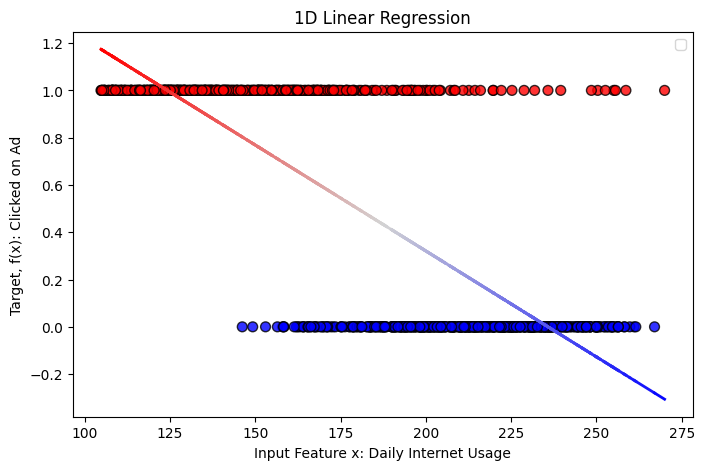

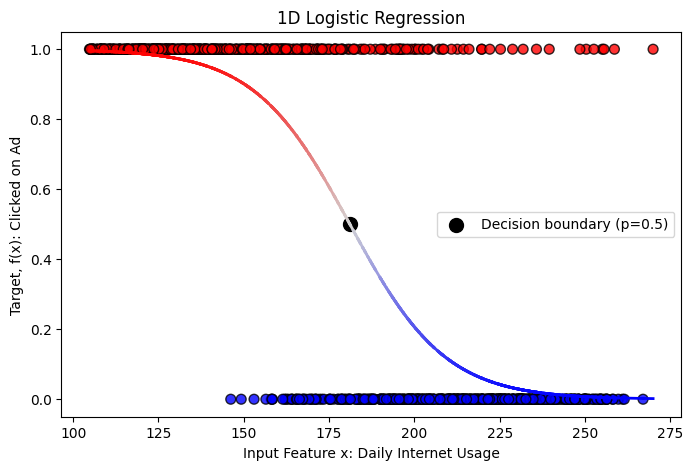

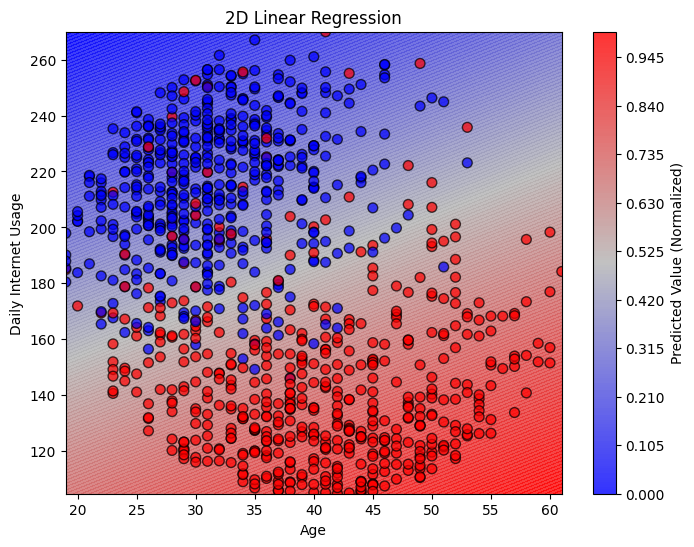

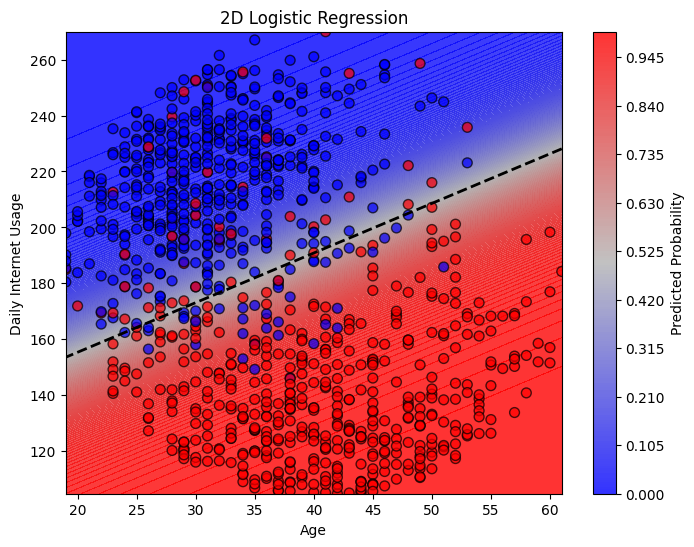

In [40]:

# For 2D
plot_regressions(df, feature1='Daily Internet Usage', target='Clicked on Ad', linear_reg=True)
plot_regressions(df, feature1='Daily Internet Usage', target='Clicked on Ad', linear_reg=False)

# For 3D
plot_regressions_plotly(df, feature1='Age', feature2='Daily Internet Usage', target='Clicked on Ad', linear_reg=True)
plot_regressions_plotly(df, feature1='Age', feature2='Daily Internet Usage', target='Clicked on Ad', linear_reg=False)


plot_regressions2d(df, feature1='Age', feature2='Daily Internet Usage', target='Clicked on Ad', linear_reg=True)
plot_regressions2d(df, feature1='Age', feature2='Daily Internet Usage', target='Clicked on Ad', linear_reg=False)

